<h2>Feature Selection - Feature selection based on Wrapper method</h2>

In [7]:
# load data
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from math import *

data = np.loadtxt('data_1.csv', delimiter = ',')
np.random.shuffle(data)

prediktori = np.delete(data, 13, axis = 1) # pred[i][j]
klase = np.delete(data, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], axis = 1) # klase[i][0] - classes 0 and 1

pocetni_pred = np.delete(data, 13, axis = 1) # pred[i][j]

def column(matrix, p):
    return np.array([row[p] for row in matrix])

In [8]:
# standardization
sr_vr = [] # mean values vector for all features
for j in range(0, 13):
    suma = 0
    std_clan = 0
    std2 = 0
    for i in range(0, len(prediktori)):
        suma += prediktori[i][j]
    sr_vr.append(suma / len(prediktori)) # mean values
    
    for k in range(0, len(prediktori)):
        std_clan += (prediktori[k][j] - sr_vr[j]) ** 2 # calculate the sum for std dev
    std2 = 1 / len(prediktori) * std_clan # std_dev ^ 2
    
    for q in range(0, len(prediktori)):
        prediktori[q][j] = (prediktori[q][j] - sr_vr[j]) / sqrt(std2)
        
# standardization
sr_vrr = [] # mean values vector for all features
for jj in range(0, 13):
    sumaa = 0
    std_clann = 0
    std22 = 0
    for ii in range(0, len(pocetni_pred)):
        sumaa += pocetni_pred[ii][jj]
    sr_vrr.append(sumaa / len(pocetni_pred)) # mean values
    
    for kk in range(0, len(pocetni_pred)):
        std_clann += (pocetni_pred[kk][jj] - sr_vrr[jj]) ** 2 # calculate the sum for std dev
    std22 = 1 / len(pocetni_pred) * std_clann # std_dev ^ 2
    
    for qq in range(0, len(pocetni_pred)):
        pocetni_pred[qq][jj] = (pocetni_pred[qq][jj] - sr_vrr[jj]) / sqrt(std22)

In [9]:
# check if the standardization is done correctly
sr_vr1 = []
for k in range(0, 13):
    suma11 = 0
    for i in range(0, len(prediktori)):
        suma11 += prediktori[i][k]
    sr_vr1.append(suma11 / len(prediktori))

    std_clan1 = 0
    std12 = 0
    for z in range(0, len(prediktori)):
        std_clan1 += (prediktori[z][j] - sr_vr1[k]) ** 2
    std12 = 1 / len(prediktori) * std_clan1
    
std12

1.0000000000000002

In [10]:
test_data = np.delete(prediktori, np.s_[0:110], axis = 0) # last 20 lines - test data
test_Y = np.delete(klase, np.s_[0:110], axis = 0) # outputs for last 20 lines - test data

train_data = np.delete(prediktori, np.s_[110:130], axis = 0) # first 110 lines - train data
train_Y = np.delete(klase, np.s_[110:130], axis = 0) # outputs for last 110 lines - train data

K = 5
fold = []
fold_Y = []
for i in range(0, K):
    fold.append(train_data[i * 20 + 2:i * 20 + 20 + 2])
    fold_Y.append(train_Y[i * 20 + 2:i * 20 + 20 + 2])

Racunanje za 1 . prediktor:
-----Racunanje za 1 . fold:
90.0
-----Racunanje za 2 . fold:
80.0
-----Racunanje za 3 . fold:
90.0
-----Racunanje za 4 . fold:
90.0
-----Racunanje za 5 . fold:
95.0
Srednja tacnost za 1 . prediktor je: 89.0
Racunanje za 2 . prediktor:
-----Racunanje za 1 . fold:
60.0
-----Racunanje za 2 . fold:
50.0
-----Racunanje za 3 . fold:
60.0
-----Racunanje za 4 . fold:
60.0
-----Racunanje za 5 . fold:
50.0
Srednja tacnost za 2 . prediktor je: 56.0
Racunanje za 3 . prediktor:
-----Racunanje za 1 . fold:
60.0
-----Racunanje za 2 . fold:
70.0
-----Racunanje za 3 . fold:
85.0
-----Racunanje za 4 . fold:
65.0
-----Racunanje za 5 . fold:
60.0
Srednja tacnost za 3 . prediktor je: 68.0
Racunanje za 4 . prediktor:
-----Racunanje za 1 . fold:
20.0
-----Racunanje za 2 . fold:
45.0
-----Racunanje za 3 . fold:
15.0
-----Racunanje za 4 . fold:
35.0
-----Racunanje za 5 . fold:
25.0
Srednja tacnost za 4 . prediktor je: 28.0
Racunanje za 5 . prediktor:
-----Racunanje za 1 . fold:
60.0

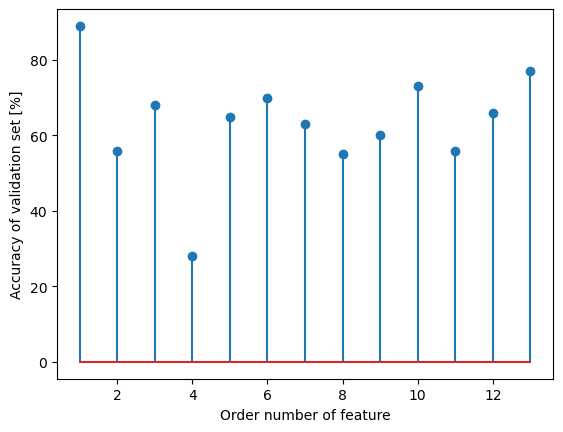

In [11]:
# determine the most valuable feature
niz_y = []
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

for i in range(0, 13):
    suma_tacnosti = 0
    print("Racunanje za", i + 1,". prediktor:")
    for j in range(0, K):
        print("-----Racunanje za", j + 1,". fold:")
        trening_skup = np.concatenate((fold[j], fold[(j + 1) % 5], fold[(j + 2) % 5], fold[(j + 3) % 5]), axis = 0)
        y_skup = np.concatenate((fold_Y[j], fold_Y[(j + 1) % 5], fold_Y[(j + 2) % 5], fold_Y[(j + 3) % 5]), axis = 0)
        validacioni_skup = fold[(j + 4) % 5]
        validaciono_y = fold_Y[(j + 4) % 5]
        
        trening_skup = column(trening_skup, i)

        suma_x = [ [ 0 for f in range(1) ] for f in range(2) ]
        br_pojavljivanja = [0, 0]

        for k in range(0, len(y_skup)):
            if(y_skup[k][0] == 0):
                br_pojavljivanja[0] = br_pojavljivanja[0] + 1
                suma_x[0] = np.sum((suma_x[0], trening_skup[k]), axis = 0)
            if(y_skup[k][0] == 1):
                br_pojavljivanja[1] = br_pojavljivanja[1] + 1
                suma_x[1] = np.sum((suma_x[1], trening_skup[k]), axis = 0)

        fi_0 = br_pojavljivanja[0] / len(y_skup)
        fi_1 = br_pojavljivanja[1] / len(y_skup)

        mi_0 = np.divide(suma_x[0], br_pojavljivanja[0])
        mi_1 = np.divide(suma_x[1], br_pojavljivanja[1])

        suma_sigma = [0, 0]
        for l in range(0, len(y_skup)):
            if(y_skup[l][0] == 0):
                suma_sigma[0] = suma_sigma[0] + np.dot(np.subtract(trening_skup[l], mi_0), np.transpose(np.subtract(trening_skup[l], mi_0)))
            if(y_skup[l][0] == 1):
                suma_sigma[1] = suma_sigma[1] + np.dot(np.subtract(trening_skup[l], mi_1), np.transpose(np.subtract(trening_skup[l], mi_1)))

        sigma_0 = np.divide(suma_sigma[0], br_pojavljivanja[0])
        sigma_1 = np.divide(suma_sigma[1], br_pojavljivanja[1])

        # decision-making
        odluke = []
        for m in range(0, len(validacioni_skup)):
            const_1 = -0.5 * pow(sigma_1, -1)
            cinilac_1 = np.transpose(np.subtract(validacioni_skup[m], mi_1))
            cinilac_2 = np.subtract(validacioni_skup[m], mi_1)
            sabirak_1 = np.multiply(np.dot(cinilac_1, cinilac_2), const_1)

            const_2 = 0.5 * pow(sigma_0, -1)
            cinilac_11 = np.transpose(np.subtract(validacioni_skup[m], mi_0))
            cinilac_22 = np.subtract(validacioni_skup[m], mi_0)
            sabirak_2 = np.multiply(np.dot(cinilac_11, cinilac_22), const_2)

            ver = pow(e, sabirak_1 + sabirak_2)
            
            y = -1
            if(ver > 1):
                y = 1
            else:
                y = 0

            odluke.append(y)

        # achieved accuracy on validation set
        br_gr = 0
        for n in range(0, len(validacioni_skup)):
            if(odluke[n] != validaciono_y[n][0]):
                br_gr = br_gr + 1

        tacnost = (len(validacioni_skup) - br_gr) / len(validacioni_skup) * 100
        suma_tacnosti += tacnost
        print(tacnost)
        
    print("Srednja tacnost za", i + 1, ". prediktor je:", suma_tacnosti / K)
    niz_y.append(suma_tacnosti / K)

prvi_pred_max = max(niz_y)
index_prvi_pred_max = niz_y.index(max(niz_y))

niz_x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
plt.stem(niz_x, niz_y)
plt.xlabel('Order number of feature')
plt.ylabel('Accuracy of validation set [%]')
plt.show()

Trazenje najboljeg 2 . prediktora:
Racunanje za 2 . prediktor pomocu 1 . kolone prediktora:
-----Racunanje za 1 . fold:
100.0
-----Racunanje za 2 . fold:
100.0
-----Racunanje za 3 . fold:
90.0
-----Racunanje za 4 . fold:
90.0
-----Racunanje za 5 . fold:
85.0
Srednja tacnost za 1 . kolonu je: 93.0
Racunanje za 2 . prediktor pomocu 2 . kolone prediktora:
-----Racunanje za 1 . fold:
90.0
-----Racunanje za 2 . fold:
95.0
-----Racunanje za 3 . fold:
95.0
-----Racunanje za 4 . fold:
90.0
-----Racunanje za 5 . fold:
85.0
Srednja tacnost za 2 . kolonu je: 91.0
Racunanje za 2 . prediktor pomocu 3 . kolone prediktora:
-----Racunanje za 1 . fold:
90.0
-----Racunanje za 2 . fold:
95.0
-----Racunanje za 3 . fold:
90.0
-----Racunanje za 4 . fold:
100.0
-----Racunanje za 5 . fold:
80.0
Srednja tacnost za 3 . kolonu je: 91.0
Racunanje za 2 . prediktor pomocu 4 . kolone prediktora:
-----Racunanje za 1 . fold:
100.0
-----Racunanje za 2 . fold:
100.0
-----Racunanje za 3 . fold:
85.0
-----Racunanje za 4 .

([<matplotlib.axis.XTick at 0x13bcfed98b0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '13'),
  Text(3, 0, '10'),
  Text(4, 0, '2'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '4'),
  Text(8, 0, '12'),
  Text(9, 0, '3'),
  Text(10, 0, '6'),
  Text(11, 0, '5'),
  Text(12, 0, '11'),
  Text(13, 0, '9')])

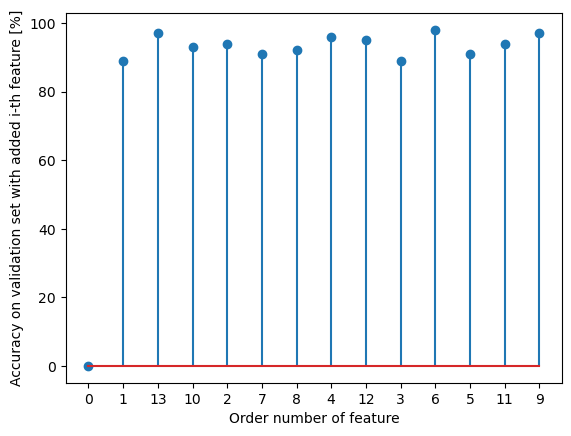

In [12]:
train_data = np.delete(column(prediktori, index_prvi_pred_max), np.s_[110:130], axis = 0)
train_Y = np.delete(klase, np.s_[110:130], axis = 0)
    
prediktori = np.delete(prediktori, index_prvi_pred_max, axis = 1)
prediktori = np.delete(prediktori, np.s_[110:130], axis = 0)
pocetni_pred = np.delete(pocetni_pred, np.s_[110:130], axis = 0)

brojac = 12

x_osa = [0, index_prvi_pred_max + 1]
y_osa = [0, prvi_pred_max]

for i in range(0, 12):
    print("Trazenje najboljeg", i + 2, ". prediktora:")
    niz_tacnosti = []
    
    for br in range(0, brojac):
        print("Racunanje za", i + 2, ". prediktor pomocu", br + 1,". kolone prediktora:")
        podaci = np.c_[train_data, column(prediktori, br)] #podaci = np.insert(train_data, i + 1, column(prediktori, br + 1)) # train_data !!!!!!!

        K = 5
        fold = []
        fold_Y = []
        for q in range(0, K):
            fold.append(podaci[q * 20 + 2:q * 20 + 20 + 2])
            fold_Y.append(train_Y[q * 20 + 2:q * 20 + 20 + 2])
            
        suma_tacnosti = 0
        for j in range(0, K):
            print("-----Racunanje za", j + 1, ". fold:")
            trening_skup = np.concatenate((fold[j], fold[(j + 1) % 5], fold[(j + 2) % 5], fold[(j + 3) % 5]), axis = 0)
            y_skup = np.concatenate((fold_Y[j], fold_Y[(j + 1) % 5], fold_Y[(j + 2) % 5], fold_Y[(j + 3) % 5]), axis = 0)
            validacioni_skup = fold[(j + 4) % 5]
            validaciono_y = fold_Y[(j + 4) % 5]
        
            suma_x = [ [ 0 for f in range(i + 2) ] for f in range(2) ]
            br_pojavljivanja = [0, 0]

            for k in range(0, len(y_skup)):
                if(y_skup[k][0] == 0):
                    br_pojavljivanja[0] = br_pojavljivanja[0] + 1
                    suma_x[0] = np.sum((suma_x[0], trening_skup[k]), axis = 0)
                if(y_skup[k][0] == 1):
                    br_pojavljivanja[1] = br_pojavljivanja[1] + 1
                    suma_x[1] = np.sum((suma_x[1], trening_skup[k]), axis = 0)

            fi_0 = br_pojavljivanja[0] / len(y_skup)
            fi_1 = br_pojavljivanja[1] / len(y_skup)

            mi_0 = np.divide(suma_x[0], br_pojavljivanja[0])
            mi_1 = np.divide(suma_x[1], br_pojavljivanja[1])

            suma_sigma = [0, 0]
            for l in range(0, len(y_skup)):
                if(y_skup[l][0] == 0):
                    suma_sigma[0] = suma_sigma[0] + np.dot(np.subtract(trening_skup[l], mi_0), np.transpose(np.subtract(trening_skup[l], mi_0)))
                if(y_skup[l][0] == 1):
                    suma_sigma[1] = suma_sigma[1] + np.dot(np.subtract(trening_skup[l], mi_1), np.transpose(np.subtract(trening_skup[l], mi_1)))

            sigma_0 = np.divide(suma_sigma[0], br_pojavljivanja[0])
            sigma_1 = np.divide(suma_sigma[1], br_pojavljivanja[1])

            # decision-making
            odluke = []
            for m in range(0, len(validacioni_skup)):
                const_1 = -0.5 * pow(sigma_1, -1)
                cinilac_1 = np.transpose(np.subtract(validacioni_skup[m], mi_1))
                cinilac_2 = np.subtract(validacioni_skup[m], mi_1)
                sabirak_1 = np.multiply(np.dot(cinilac_1, cinilac_2), const_1)

                const_2 = 0.5 * pow(sigma_0, -1)
                cinilac_11 = np.transpose(np.subtract(validacioni_skup[m], mi_0))
                cinilac_22 = np.subtract(validacioni_skup[m], mi_0)
                sabirak_2 = np.multiply(np.dot(cinilac_11, cinilac_22), const_2)

                ver = pow(e, sabirak_1 + sabirak_2)

                y = -1
                if(ver > 1):
                    y = 1
                else:
                    y = 0

                odluke.append(y)

            # achieved accuracy on validation set
            br_gr = 0
            for n in range(0, len(validacioni_skup)):
                if(odluke[n] != validaciono_y[n][0]):
                    br_gr = br_gr + 1

            tacnost = (len(validacioni_skup) - br_gr) / len(validacioni_skup) * 100
            suma_tacnosti += tacnost
            print(tacnost)
            
        podaci = train_data

        niz_tacnosti.append(suma_tacnosti / K)
        print("Srednja tacnost za", br + 1, ". kolonu je:", suma_tacnosti / K)
        
    max_tacnost = max(niz_tacnosti) # max accuracy from all columns for n-th feature
    kolona_max_tacnosti = niz_tacnosti.index(max(niz_tacnosti))
    
    br_kolone = 0
    for z in range(0, 13):
        if(np.array_equal(column(pocetni_pred, z), column(prediktori, kolona_max_tacnosti))):
            x_osa.append(z + 1)
            br_kolone = z + 1
    
    print("Novi najbolji prediktor rednog broja", i + 2, "je kolona prediktora rednog broja", br_kolone)
            
    print("Tacnost koju kombinacija prethodnih prediktora sa datim novim iznosi:", max_tacnost)
            
    y_osa.append(max_tacnost)
    train_data = np.c_[train_data, column(prediktori, kolona_max_tacnosti)] #train_data = np.insert(train_data, i + 1, column(prediktori, kolona_max_tacnosti), axis = 1) # train_data !!!!!!!
    prediktori = np.delete(prediktori, kolona_max_tacnosti, axis = 1)

    brojac -= 1

fig = plt.figure()
ax = fig.add_subplot(111)
y = y_osa
xt = x_osa
ax.stem(xt, y)
plt.xlabel('Order number of feature')
plt.ylabel('Accuracy on validation set with added i-th feature [%]')
plt.xticks(range(len(y)), xt)